<h1>Matplotlib Bar Chart Guide</h1>
<p><b>For SMASH CS Fundamentals II: Data Analysis</b>
<br>This guide teaches you how you create basic bar charts with <b>matplotlib</b>.</p>
<p>matplotlib.pyplot API:
<br>https://matplotlib.org/api/pyplot_api.html</p>

<h2>Import matplotlib.pyplot as plt</h2>
<p>As always, we will be using pyplot for all of our visualization needs.
<br>Be sure to import it at the top of your file. Otherwise you won't be able to do anything.
<br>The <i>"as plt"</i> part is just so we don't need to say <i>matplotlib.pyplot</i> each time we want to use it.</p>

In [1]:
import matplotlib.pyplot as plt

<h2>Create your data</h2>
<p>Later in the course we'll be using very large amounts of data from a database.
<br>But for now let's just use some small data.
<br>Here's some: http://www.usclimatedata.com
<br>Take a look at the monthly temperatures in Washington, DC from 1961-1990.
<br>Let's use <b>tuples</b> to store this data.

In [2]:
# the data, taken from http://www.usclimatedata.com
low_avg_temps = (27, 28, 35, 44, 54, 63, 68, 66, 59, 48, 38, 29)
high_avg_temps = (42, 44, 53, 64, 75, 83, 87, 84, 78, 67, 55, 45)
month_labels = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

<p>The <i>month_labels</i> tuple is there for later.
<br>By the way, why did I decide to use tuples and not lists to store this data? Think about it:
<ul>
    <li>There are exactly 12 months.</li>
    <li>The order in which the numbers are arranged has meaning (i.e., the order of the months).</li>
    <li>Since these months already happened, so I the values won't change.</li>
</ul>
<p>First, let's just make a bar chart of the <b>low average temperatures</b>.</p>

<h2>Setup your graphic</h2>
<p>I'll use comments to annotate each part of this bit.</p>

In [3]:
# Width of bars in pixels. I'll use this in a bit. 
bar_width = 0.35

# This list corresponds with the number of months, which will be my x-axis.
x_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
'''
Create y_range by specifiying values from 0 to a max value that makes sense.
For degrees farenheit, a good max value might be 95.
matplotlib will not actually draw a tick for 95 unless a temp gets that high, but I'm 
still making sure I'm giving it a realistic maximum. 

We'll start at 0 and increment 5 each tick until we hit 95. 
Just like you would with a for-loop.

y_range = range(0, 95, 5)

You should transform that range into list by wrapping list() around it:

y_range = list(range(0, 95, 5))

As a general rule, the baseline for a bar chart should be 0.
Otherwise you risk mischaracterizing your data.
Starting at 0 ensures that the length of each bar represents the temperature.
See here for more: https://flowingdata.com/2015/08/31/bar-chart-baselines-start-at-zero/
'''
y_range = list(range(0, 95, 5))

#Place this above all of your figures. 
#It just ensures gridlines appear behind everything else.
plt.rc("axes", axisbelow=True)

# Give this figure a unique number.
plt.figure(1)

# Create x-axis tickmarks according to the x_range. 
# The "month_labels" here just apply the labels to those tickmarks.
plt.xticks(x_range,  month_labels)

# Create the y-axis tickmarks according to the y_range.
plt.yticks(y_range)

# Create horizontal gridlines so it's easier to measure the bars.
plt.grid(axis="y")

# What's the name of your graphic?
# I'm using \N{DEGREE SIGN} ensure the degree sign goes before F. 
# And of course, \n just puts everything after it on the next line. 
plt.title('Washington, DC (1961-1990)\nAverage Monthly Temperatures (\N{DEGREE SIGN}F)')

# Don't need to label the x-axis since the months are already labeled.
# So let's label the y-axis.
plt.ylabel('Avg Temp (\N{DEGREE SIGN}F)')

<h2>Draw the bars</h2>
<p>This is the easy part. It's just a few lines.</p>

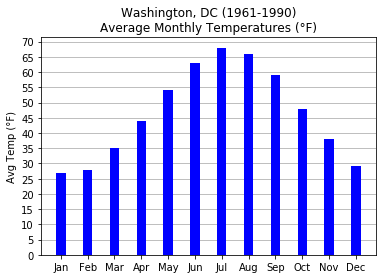

In [4]:
# Draw the bar chart.
plt.bar(x_range, low_avg_temps, width=bar_width, color="blue")

# Show the figure.
plt.show()

<p>that looks cool. In PyCharm we can edit it to make it prettier from here.
<br>But for now this'll do. 
<br>Why not make a <b>horizontal</b> bar chart?
<br>It might provide a more intuitive way to view this data.</p>

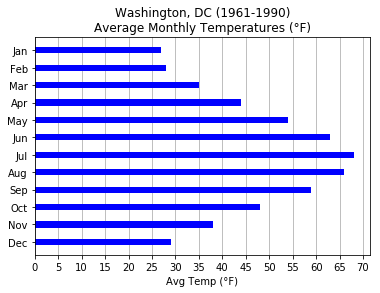

In [5]:
# Give the figure a unique number.
plt.figure(2)

# Setup your x and y tickmarks just like last time, but in reverse.
plt.xticks(y_range)
plt.yticks(x_range,  month_labels)

# This nifty little function here just reverses the y-axis, so January appears at the top.
plt.gca().invert_yaxis()

# This time we'll need vertical gridlines.
plt.grid(axis="x")

# This part doesn't change.
plt.title('Washington, DC (1961-1990)\nAverage Monthly Temperatures (\N{DEGREE SIGN}F)')

# Now we need to label our x-axis.
plt.xlabel('Avg Temp (\N{DEGREE SIGN}F)')

# To draw the bars, we use barh and specify height, not width.
plt.barh(x_range, low_avg_temps, height=bar_width, color="blue")

# Show the figure.
plt.show()

<h2>Draw two datasets side-by-side for comparison</h2>
<p>This is both easier and harder than it sounds.
<br>The easy part is drawing both datasets on the same chart.
<br>The hard part is drawing them <i>neatly</i>.
<br>You'll need some aesthetic sense and a bit of math for this.</p>

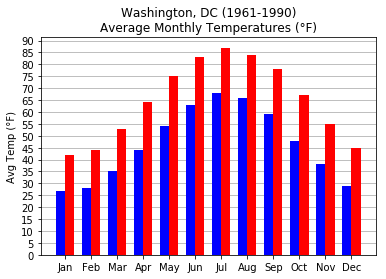

In [6]:
# Give the figure a unique number.
plt.figure(3)

# This stuff doesn't change
plt.xticks(x_range,  month_labels)
plt.yticks(y_range)

# Horizontal gridlines again.
plt.grid(axis="y")

# This part doesn't change.
plt.title('Washington, DC (1961-1990)\nAverage Monthly Temperatures (\N{DEGREE SIGN}F)')

# Label the y-axis
plt.ylabel('Avg Temp (\N{DEGREE SIGN}F)')

'''
Draw the the two sets of bars. 

Our bars now need to be setup so that they appear side-by-side.

For the low_avg_temps bars, we'll use x - (bar_width / 2). This will move those 
bars to the left of the tickmark by half of the width of the bar itself.

Using this same logic, we'll use x + (bar_width / 2) for the high_avg_temps bars.

There are two ways to do either. Here's the longer way:

low_range = []
for x in x_range:
    low_range.append(x - bar_width / 2)

A slicker, more "Pythonistic" way of doing it:

low_range = [x - bar_width / 2 for x in x_range]

Choose whichever way you like. I'm using the shorter way to save some typing.
'''
low_range = [x - bar_width / 2 for x in x_range]
high_range = [x + bar_width / 2 for x in x_range]
plt.bar(low_range, low_avg_temps, bar_width, color='blue', label='low')
plt.bar(high_range, high_avg_temps, bar_width, color='red', label='high')

# Show the figure.
plt.show()

<h2>That's all!</h2>
<p>There is more to bar charts, but this is all you'll need for this course.
<br>I suggest playing around with this more until you feel more comfortable.
<br>And you can learn a lot by utilizing the excellent documentation I linked at the top.</p>